# Random Forest model experamentation

In [225]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
df = pd.read_csv('../data/finalized_customer_churn_records.csv')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,...,456,0,0,1,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,...,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,425,0,0,1,1,0,0,1,0,0


In [227]:
target_variable = df['Exited'].values
df.drop('Exited', axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Complain', 'Satisfaction Score',
       'Point Earned', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Complain            10000 non-null  int64  
 9   Satisfaction Score  10000 non-null  int64  
 10  Point Earned        10000 non-null  int64  
 11  Geography_France    10000 non-null  int64  
 12  Geography_Germany   10000 non-null  int64  
 13  Geography_Spain     10000 non-null  int64  
 14  Gender_Female       10000 non-null  int64  
 15  Gender_Male         10000 non-null  int64  
 16  Card 

## Split dataset into training and testing set

In [229]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

RANDOM_STATE = 3

over_sample = RandomOverSampler(sampling_strategy='minority', random_state=RANDOM_STATE)
df, target_variable = over_sample.fit_resample(df, target_variable)

X_train, X_test, y_train, y_test = train_test_split(df, target_variable, random_state=RANDOM_STATE, stratify=target_variable, test_size=0.30)

print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}\nX_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


X_train shape: (11146, 20)
y_train shape: (11146,)
X_test shape: (4778, 20)
y_test shape: (4778,)


## Simple RandomForest implementation

In [230]:
rf = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=100)

%time
rf.fit(X_train, y_train)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 9.3 µs


RandomForestClassifier(random_state=3)

In [231]:
rf_preds = rf.predict(X_test)

print(classification_report(y_test, rf_preds))

confusion_matrix_ = confusion_matrix(y_test, rf_preds)
print(f'False negative rate:\n{confusion_matrix_[0][1]/len(y_test)*100}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00      2389

    accuracy                           1.00      4778
   macro avg       1.00      1.00      1.00      4778
weighted avg       1.00      1.00      1.00      4778

False negative rate:
0.06278777731268313


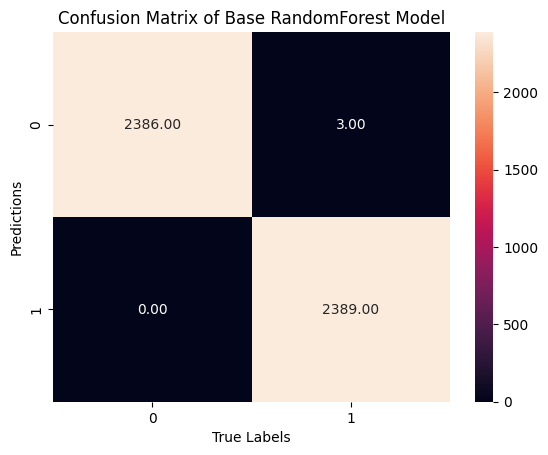

In [232]:
sns.heatmap(data=confusion_matrix_, annot=True, fmt='.2f')
plt.title('Confusion Matrix of Base RandomForest Model')
plt.xlabel('True Labels')
plt.ylabel('Predictions')
plt.show()


### Hyper-Parameter Tuning

In [233]:
params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3,4,5,6,7],
    'min_samples_split': [2,3,4,5]
}

rf_grid = GridSearchCV(estimator=rf, param_grid=params, cv=5, verbose=2, scoring=['f1_weighted', 'recall_macro'], refit='f1_weighted', n_jobs=-1)

rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_split=2, n_estimators=200; total time=   2.1s
[CV] END m

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=3), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             refit='f1_weighted', scoring=['f1_weighted', 'recall_macro'],
             verbose=2)

In [234]:
rf_grid.best_params_

{'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [235]:
rf_grid_preds = rf_grid.predict(X_test)

In [236]:
# print(confusion_matrix(y_test, rf_grid_preds))
print(f'False negative rate:\n{confusion_matrix_[0][1]/len(y_test)*100}')

False negative rate:
0.06278777731268313


### Final RandomForest Model

In [237]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, max_features='sqrt', min_samples_split=2)

%time
rf_model.fit(X_train, y_train)

CPU times: user 1e+03 ns, sys: 1 µs, total: 2 µs
Wall time: 7.87 µs


RandomForestClassifier(max_depth=7)

In [238]:
rf_preds = rf_model.predict(X_test)

## Scoring

In [239]:
print(classification_report(y_test, rf_preds))

confusion_matrix_ = confusion_matrix(y_test, rf_preds)
print(f'False negative rate:\n{confusion_matrix_[0][1]/len(y_test)*100}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00      2389

    accuracy                           1.00      4778
   macro avg       1.00      1.00      1.00      4778
weighted avg       1.00      1.00      1.00      4778

False negative rate:
0.06278777731268313


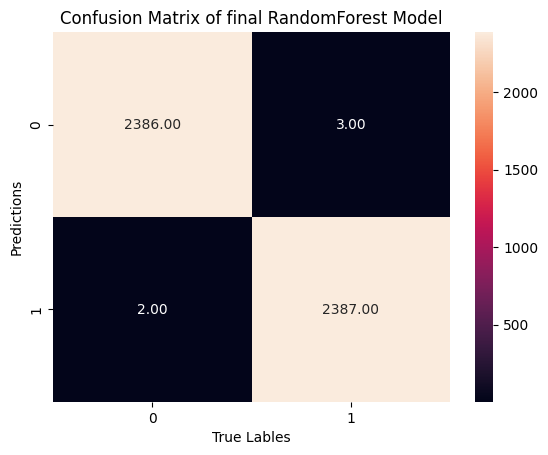

In [240]:
sns.heatmap(data=confusion_matrix_, fmt='.2f', annot=True)
plt.title('Confusion Matrix of final RandomForest Model')
plt.xlabel('True Lables')
plt.ylabel('Predictions')
plt.show()

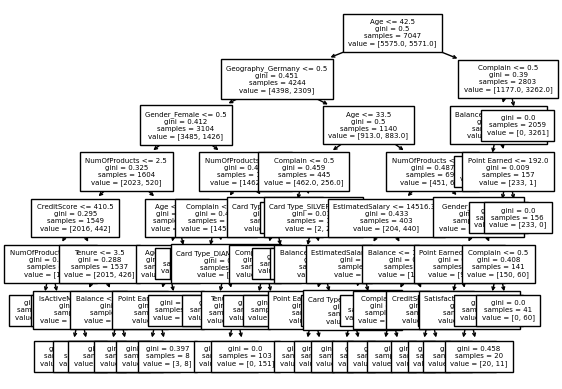

In [241]:
from sklearn import tree

tree.plot_tree(rf_model.estimators_[5], feature_names=df.columns, fontsize=5)
plt.show()

In [242]:
feature_importances = rf_model.feature_importances_

importances_df = pd.DataFrame({
    'Features': df.columns,
    'Importance': feature_importances,
    'Importance_as_%': [(feature * 100) for feature in feature_importances]
})

importances_df.drop(columns=['Importance'], axis=1, inplace=True)
importances_df.sort_values(by='Importance_as_%', ascending=False, inplace=True)

importances_df.head(15)

,Features,Importance_as_%
8,Complain,77.618143
1,Age,9.537998
4,NumOfProducts,5.973515
3,Balance,1.417385
6,IsActiveMember,1.409565
12,Geography_Germany,1.120666
15,Gender_Male,0.500373
14,Gender_Female,0.429695
0,CreditScore,0.402885
10,Point Earned,0.388536


We can see that the RandomForest Classifier is giving us a false negative score of ~.06 and the top features that is using to make its decisions.
- In the diagram of the tree we see that 'Age' is the root node with the next layer os internal nodes being 'Complain' and 'Geography_Germany' and so on down the tree

In [243]:
import pickle

with open('../final_models/rf_model.pkl', 'wb') as model:
    pickle.dump(rf_model, model)